<h1> Datos para probar las técnicas de analísis. </h1>

<h2>Los pasos que intentare seguir para tener una metodología son: </h2>
<br>
<li>Paso cero: Extraccion de los datos, limpieza, reducción y eliminación en los casos que apliquen.</li>
<li>Paso uno: Estandarizar, normalizar y/o reducir los datos.</li>
<li>Paso dos: Codificar las variables categoricas.</li>
<li>Paso tres: Escojer el médelo de machine learning que nos ayude a resolver el problema</li>

In [55]:
#Import las primeras librerias que podriamos utilizar
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
#Leer el archivo que en esta ocasión esta separada por tabulaciones
matriz = pd.read_csv("Customers.csv", sep="\t")
matriz.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [57]:
#Colocar indice al dataframe matriz.
indice = np.arange(0,matriz.shape[0])
matriz = matriz.reindex( indice )
#Revisar la matriz.
print("\nTamaño de la matriz: \n ", matriz.shape )
print("\nPrimeras filas de la matriz: \n ",  matriz.head(2) )
#Cuantificar la cantidad de datos perdidos para determinar si los eliminamos, rellenamos, etc.
print("\nCantidad de datos faltantes: \n ", matriz.isnull().sum()  )
print("\nCantidad de datos faltantes en porcentaje \n", matriz.isnull().sum()/matriz.shape[0]*100)
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", matriz.info() )
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", matriz.describe() ) 


Tamaño de la matriz: 
  (2240, 29)

Primeras filas de la matriz: 
       ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  

[2 rows x 29 columns]

Cantidad de datos faltantes: 
  ID                      0
Year_Birth              0
Education               0
Marit

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <Ax

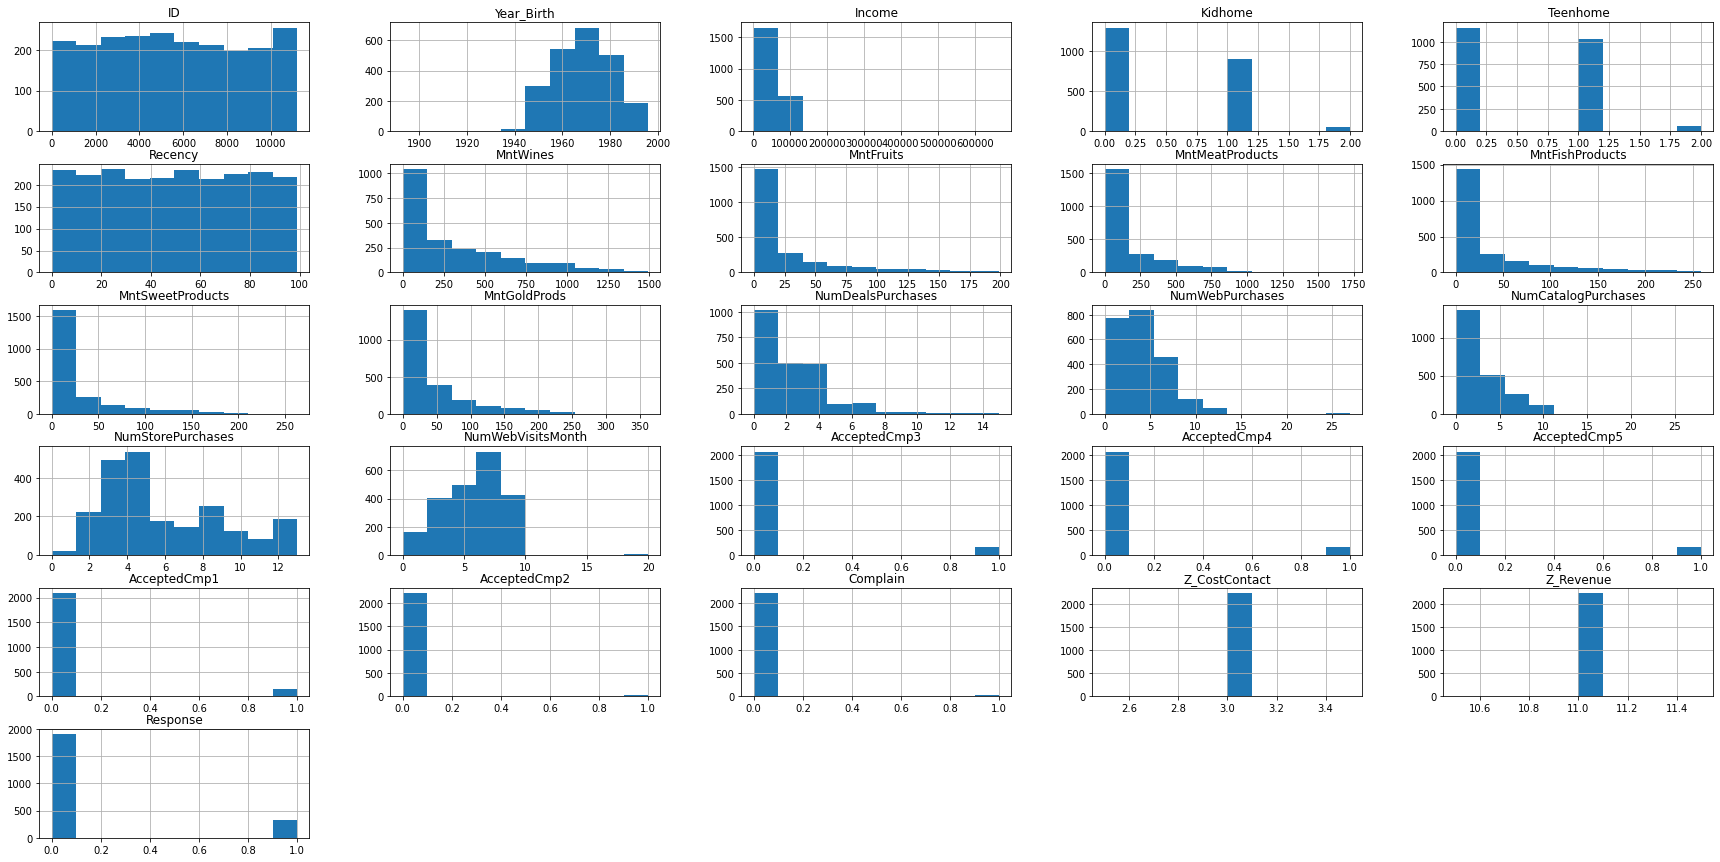

In [58]:
#Revisar la forma de las variables.
matriz.hist( figsize=(30,15) )

In [59]:
#en esta base solo faltan datos en la columna income, pero son el 1 por ciento, asi que los vamos a eliminar de la base.
matriz = matriz.dropna()
print("\nCantidad de datos faltantes en porcentaje \n", matriz.isnull().sum()/matriz.shape[0]*100)


Cantidad de datos faltantes en porcentaje 
 ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64


In [60]:
#Calculemos la edad del cliente
matriz["Age_"] = 2022 - matriz["Year_Birth"]

In [61]:
# Agrupemos las edades para despué analizar
#grupos= [0,13,21,40,90]
#etiquetas = ['Child','Teens','Adult','Old']
#matriz['Age_range'] = pd.cut(matriz['Age_'], bins=grupos, labels=etiquetas, right=False)

In [62]:
#Las siguientes columnas nos dicen el gasto las compras y las campañas, asi que se intetnan agrupar
gastos = matriz.columns[8:14]
compras = matriz.columns[14:19]
campañas = matriz.columns[19:24]

In [63]:
#Agrgar todo el gasto en una sola columna
matriz['Total_spent'] = matriz[gastos].sum(axis=1)

In [64]:
#Antes de reemplazar variables categoricas por numericas hay que hacer un mejor agrupameinto.
print( "\nHay que mirar el nombre de las categorias\n", matriz["Education"].value_counts() )
categorias = {"Graduation":"graduate", "PhD":"postgraduate", "Master":"postgraduate", "2n Cycle":"Undergraduate", "Basic":"Undergraduate"}
matriz["Education_"] = matriz["Education"].replace(categorias)
print( "\nHay que mirar el nombre de las nuevas categorias\n", matriz["Education_"].value_counts())


Hay que mirar el nombre de las categorias
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Hay que mirar el nombre de las nuevas categorias
 graduate         1116
postgraduate      846
Undergraduate     254
Name: Education_, dtype: int64


In [65]:
# Vamos a reemplazar la variable education categorica por una numerica.
print( "\nHay que mirar el nombre de las categorias\n", matriz["Marital_Status"].value_counts() )
categorias = {"Married":"married", "Together":"married", "Single":"single", "Divorced":"single", "Widow":"single", "Alone":"single", "Absurd":"single", "YOLO":"single"}
matriz["Marital_Status_"] = matriz["Marital_Status"].replace(categorias)
print( "\nHay que mirar el nombre de las categorias\n", matriz["Marital_Status_"].value_counts() )



Hay que mirar el nombre de las categorias
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Hay que mirar el nombre de las categorias
 married    1430
single      786
Name: Marital_Status_, dtype: int64


In [66]:
#Vamos a colocar el numero de niños en una sola variable
matriz["Children_"] = matriz["Kidhome"] + matriz["Teenhome"]

In [67]:
#Aqui calculamos el numero de años que el cliente tiene con nosotros
matriz['Dt_Customer_'] = 2022 - pd.DatetimeIndex(matriz['Dt_Customer']).year

In [68]:
#Vamos a renombrar algunas columnas. 
matriz = matriz.rename(columns={"NumDealsPurchases": "Deals","NumWebPurchases":"Web","NumCatalogPurchases":"Purchases",
                        "NumStorePurchases":"Store","NumWebVisitsMonth":"Visits"})

In [69]:
#Vamos a renombrar algunas columnas. 
matriz = matriz.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish"
                          ,"MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [70]:
#Vamos a renombrar algunas columnas. 
matriz = matriz.rename(columns={"AcceptedCmp1": "Cm1","AcceptedCmp2": "Cm2","AcceptedCmp3": "Cm3",
                        "AcceptedCmp4": "Cm4", "AcceptedCmp5": "Cm5"})

In [71]:
# Vamos a eliminar columnas que ya no utilizaremos.
columnas_eliminar = ["Education","Marital_Status", "Kidhome","Teenhome","Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"] 
matriz = matriz.drop(columnas_eliminar , axis = 1)

In [72]:
#Separemos las columnas numericas de las categoricas. Como lo índica la matriz.
columnas_categoricas = matriz.select_dtypes("object")
columnas_numericas = matriz.select_dtypes(np.number)
print("\nVariables numericas: \n ", columnas_numericas.columns )
print("\nVariables categoricas: \n ", columnas_categoricas.columns )

# Hay un módulo que nos ayuda a realizar esta acción.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Hay que mirar como quedan las variable categoricas codificadas.
for columna in columnas_categoricas:
    print('\nNombre de la columna:', "\n", columna)    
    matriz[columna] = matriz[[columna]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)


Variables numericas: 
  Index(['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'Deals', 'Web', 'Purchases', 'Store', 'Visits', 'Cm3', 'Cm4',
       'Cm5', 'Cm1', 'Cm2', 'Complain', 'Response', 'Age_', 'Total_spent',
       'Children_', 'Dt_Customer_'],
      dtype='object')

Variables categoricas: 
  Index(['Education_', 'Marital_Status_'], dtype='object')

Nombre de la columna: 
 Education_
Undergraduate : 0
graduate : 1
postgraduate : 2

Nombre de la columna: 
 Marital_Status_
married : 0
single : 1


In [73]:
#Aquí verificamos como todas las varibales ahora son numericas, tanto numeros enteros como continuos.
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", matriz.info() )
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", matriz.describe() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           2216 non-null   float64
 1   Recency          2216 non-null   int64  
 2   Wines            2216 non-null   int64  
 3   Fruits           2216 non-null   int64  
 4   Meat             2216 non-null   int64  
 5   Fish             2216 non-null   int64  
 6   Sweets           2216 non-null   int64  
 7   Gold             2216 non-null   int64  
 8   Deals            2216 non-null   int64  
 9   Web              2216 non-null   int64  
 10  Purchases        2216 non-null   int64  
 11  Store            2216 non-null   int64  
 12  Visits           2216 non-null   int64  
 13  Cm3              2216 non-null   int64  
 14  Cm4              2216 non-null   int64  
 15  Cm5              2216 non-null   int64  
 16  Cm1              2216 non-null   int64  
 17  Cm2           

<AxesSubplot:>

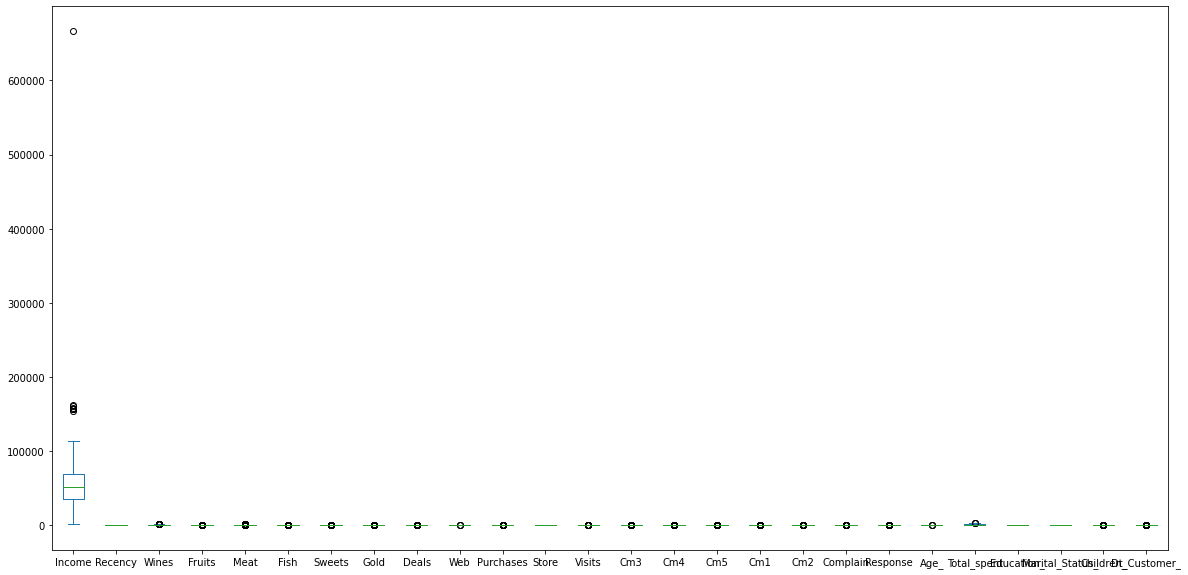

In [74]:
#Revisar los outliers.
matriz.plot( kind = "box", figsize=(20,10) ) 

In [75]:
#Vamos a remover los "outliers" en las columnas numericas que hacen el sesgo en los datos.
def remover_outliers(matriz, columnas):    
    for columna in columnas:
        q1 = matriz[columna].quantile(q = 0.25)
        q3 = matriz[columna].quantile(q = 0.75)
        interCuartil = q3 - q1
        rangoAlto = q3 + (1.5*interCuartil)
        rangoBajo = q1 - (1.5*interCuartil)
        matriz.loc[matriz[columna] > rangoAlto, columna] = np.nan
        matriz.loc[matriz[columna] < rangoBajo, columna] = np.nan
    return matriz.dropna()
 

<AxesSubplot:>

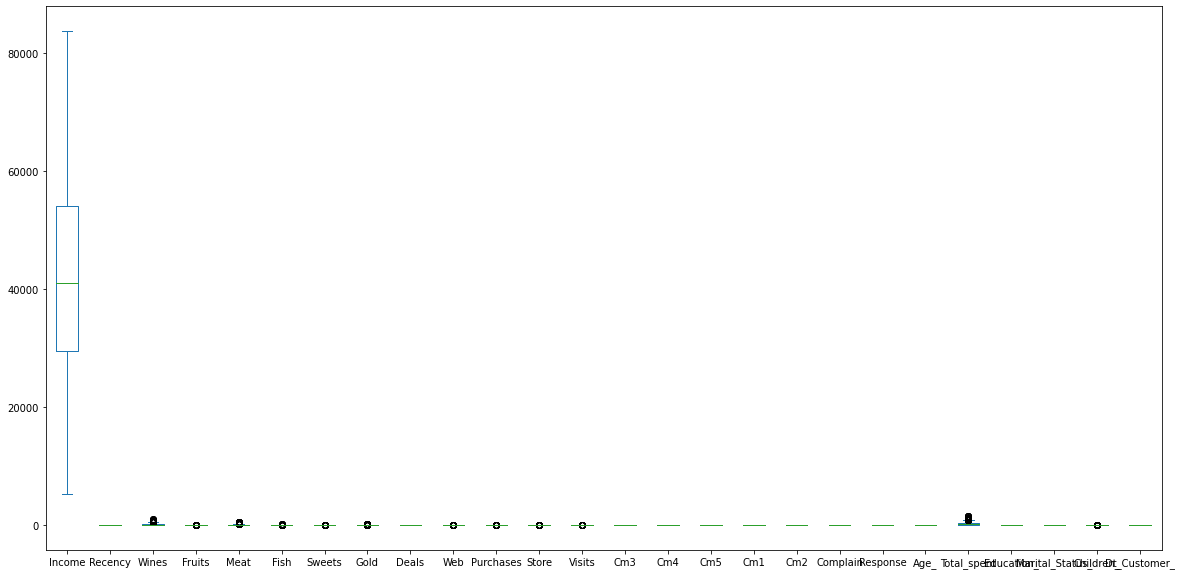

In [76]:
matriz = remover_outliers(matriz, columnas_numericas)
#Revisar los outliers.
matriz.plot( kind = "box", figsize=(20,10) )

<AxesSubplot:>

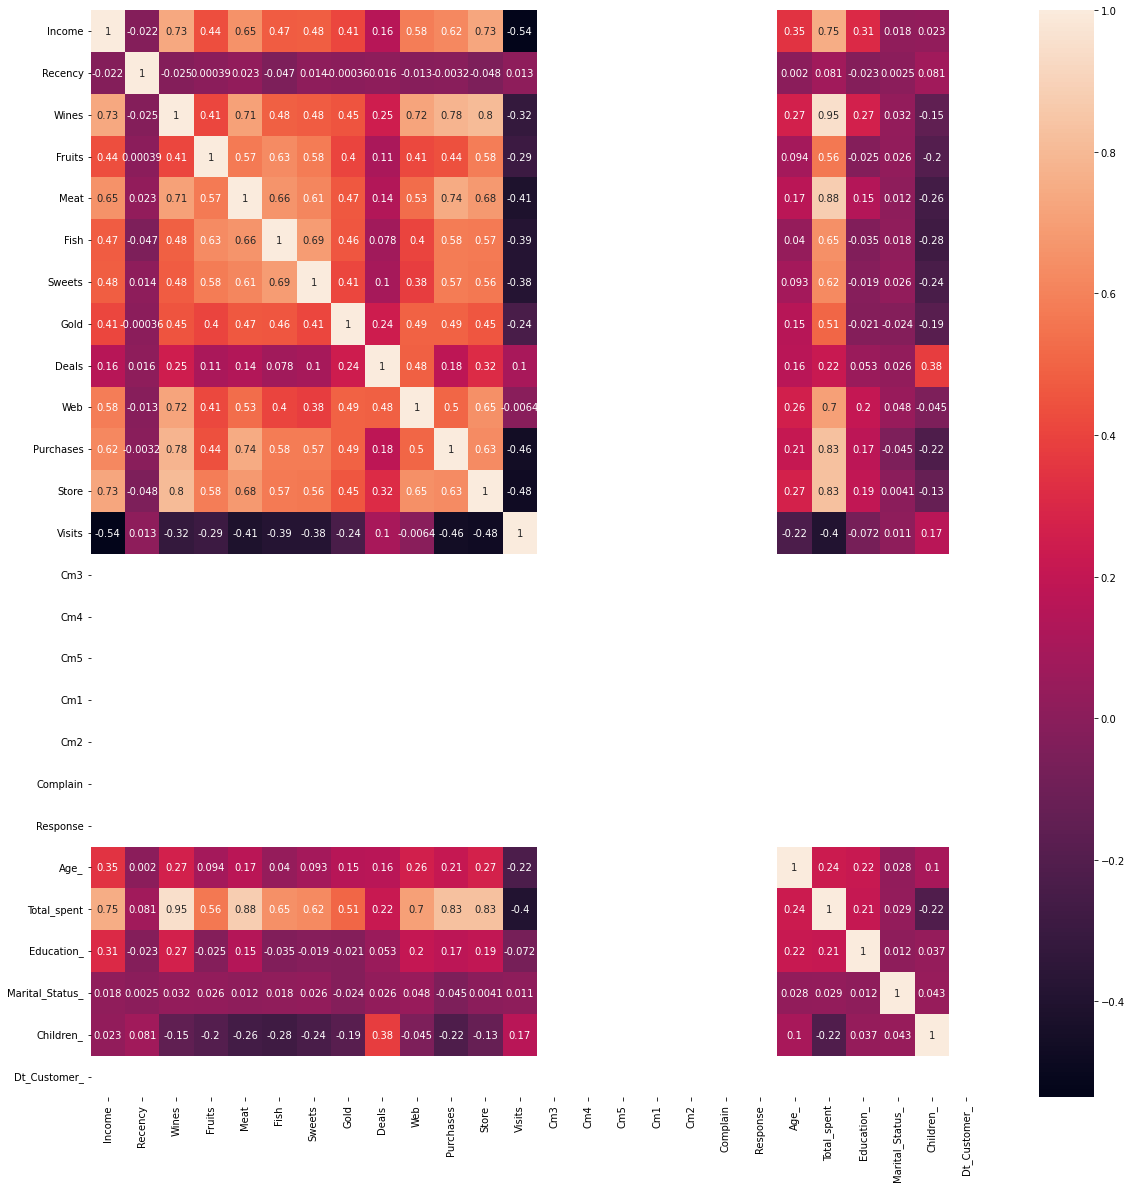

In [77]:
# Miremos la correlacion de cada variable
plt.figure(figsize=(20,20))  
corr = matriz.corr()
sns.heatmap(corr, annot= True)

Text(0.5, 1.0, 'Age  & Wines')

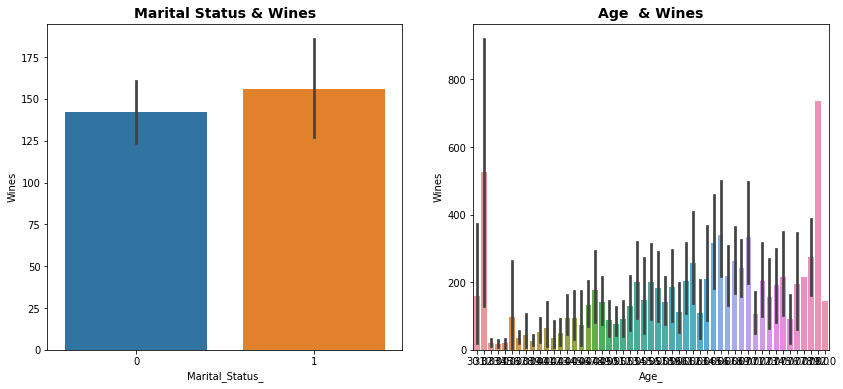

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Wines', fontsize= 14, weight = 'bold')
sns.barplot(data = matriz , x ='Marital_Status_', y = 'Wines', ax = ax1)

sns.barplot(data = matriz , x ='Age_', y = 'Wines',  ax = ax2)
ax2.set_title('Age  & Wines', fontsize= 14, weight = 'bold')


In [80]:
#Vamos a standarizar los datos con variables continuas antes de aplicar el pca.
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
for columna in columnas_numericas:
    matriz[columna] = scalar.fit_transform(matriz[[columna]])
print("\nMatriz con datos dentrados: \n ", matriz.head(2) )
print("\nTipos de variables de la nueva matriz con datos centrados: \n ", matriz.info())


Matriz con datos dentrados: 
       Income   Recency     Wines    Fruits      Meat      Fish    Sweets  \
2  1.879100 -0.866303  1.384521  2.708238  0.687471  4.214592  0.709746   
5  1.307267 -1.216515  1.850327  2.222638  0.373649 -0.677945  2.108306   

       Gold     Deals       Web  ...  Cm1  Cm2  Complain  Response      Age_  \
2  0.678892 -0.925255  2.171945  ...  0.0  0.0       0.0       0.0  0.385538   
5 -0.384099 -0.173112  1.277030  ...  0.0  0.0       0.0       0.0  0.210483   

   Total_spent  Education_  Marital_Status_  Children_  Dt_Customer_  
2     1.510495           1                0  -1.808531           0.0  
5     1.373623           2                0  -0.171499           0.0  

[2 rows x 26 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 2 to 2234
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           630 non-null    float64
 1   Recency         

C:\Users\WINDOW~1\AppData\Local\Temp/ipykernel_10112/2857369814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz[columna] = scalar.fit_transform(matriz[[columna]])
C:\Users\WINDOW~1\AppData\Local\Temp/ipykernel_10112/2857369814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriz[columna] = scalar.fit_transform(matriz[[columna]])
C:\Users\WINDOW~1\AppData\Local\Temp/ipykernel_10112/2857369814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [82]:
#Reducir la matriz para poder graficar los datos.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matriz.values)
pcaEscalarReducido = pca.transform(matriz.values)
print("Dimensiones originales: {}".format(str(matriz.shape)))
print("Dimensiones reducidas: {}".format(str(pcaEscalarReducido.shape)))
matriz_pca_escalar = pd.DataFrame (pcaEscalarReducido , columns=["pc1","pc2"])
print("\nMatriz reducida por medio de pca: \n ", matriz_pca_escalar.head(2) )
print("\nTipos de variables de la nueva matriz con pca: \n ", matriz_pca_escalar.info())

Dimensiones originales: (630, 26)
Dimensiones reducidas: (630, 2)

Matriz reducida por medio de pca: 
          pc1       pc2
0  5.519324 -2.039975
1  3.905032  0.187784
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     630 non-null    float64
 1   pc2     630 non-null    float64
dtypes: float64(2)
memory usage: 10.0 KB

Tipos de variables de la nueva matriz con pca: 
  None


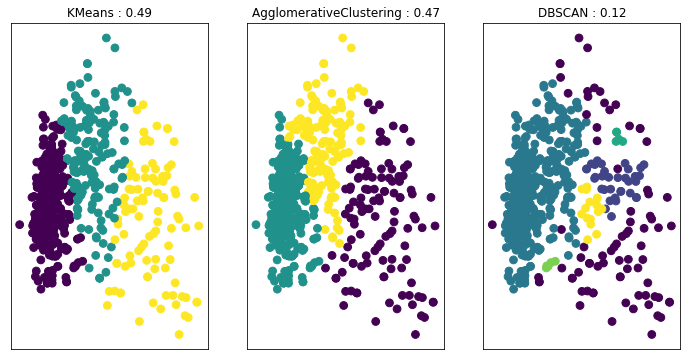

In [85]:
#Apliquemos los algoritmos a esa matriz.
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(1, 3, figsize=(12, 6),subplot_kw={'xticks': (), 'yticks': ()})
algoritmos = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),DBSCAN()]
for ax, algoritmo in zip(axes, algoritmos):
    grupos = algoritmo.fit_predict(matriz_pca_escalar)
    df_grupos = pd.DataFrame( grupos, columns= ["Categorias"])
    df_matriz = pd.merge(matriz_pca_escalar, df_grupos, left_index= True, right_index= True, how = "inner")
    df_matriz.to_csv("customers_{}.csv".format(algoritmo))
    ax.scatter(matriz_pca_escalar.iloc[:, 0], matriz_pca_escalar.iloc[:, 1], c=grupos, cmap="viridis", s=60)
    ax.set_title("{} : {:.2f}".format(algoritmo.__class__.__name__,silhouette_score(matriz_pca_escalar, grupos)))
